<h1>Introduction of Dataset</h1>

This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy.

<h1>Objective</h1>

The task is predict that which mushrooms are safe to eat or deadly poison.

In [1]:
# Import necessary packages
import os
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:\\YBI Foundation\\Projects\\MushroomClassification.csv")
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


<h2><i>Data Exploration</i></h2>

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
#Showing the total number of rows and columns
df.shape

(8124, 23)

<h2><i>Data Cleaning</i></h2>

In [7]:
# checking the null values in the dataset
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

<h4>Observation</h4><ul><li>There is no null value in the dataset.</ul>

In [8]:
# checking the duplicate values
df.duplicated().sum()

0

In [9]:
# checking descriptive statistics
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


<h4>Observation</h4><ul><li>Describe function display all the descriptive statistical values of the dataset features.</ul>

In [11]:
edible = len(df[df["class"] == "e"])
poisonous = len(df[df["class"] == "p"])

print(f"There are {edible} edible mushrooms and {poisonous} poisonous mushrooms.")

There are 4208 edible mushrooms and 3916 poisonous mushrooms.


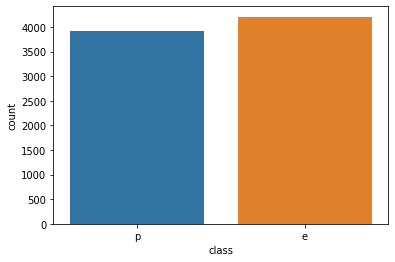

In [13]:
# Visualize this
sns.countplot(x="class", data=df)
plt.show()

<h2><i>Data Preparation</i></h2>

In [14]:
# Coonvert the categorical data
not_change = ["class"]
change_cols = list(set(df.columns) - set(not_change))

df = pd.get_dummies(df, columns=change_cols)

df.tail()

,class,gill-size_b,gill-size_n,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,ring-number_n,ring-number_o,ring-number_t,...,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y
8119,e,1,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
8120,e,1,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
8121,e,1,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
8122,p,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
8123,e,1,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [15]:
# Replacing values in class column
df["class"] = df["class"].replace("p", 1)
df["class"] = df["class"].replace("e", 0)

df.head()

,class,gill-size_b,gill-size_n,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,ring-number_n,ring-number_o,ring-number_t,...,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y
0,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [26]:
from sklearn.model_selection import train_test_split

X = df.drop("class", axis=1)
y = df["class"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=42)

<h2><i>Data Modelling and Evaluation</i></h2>

In [27]:
# K Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [28]:
y_pred_knn = knn.predict(X_test)

In [29]:
accuracy_score(y_test, y_pred_knn) * 100

100.0

In [30]:
# Random Forest Model

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=2)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=2)

In [31]:
y_pred_rf = rf.predict(X_test)

In [32]:
accuracy_score(y_test, y_pred_rf) * 100

100.0

In [33]:
# Naive Bayes Model

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [34]:
y_pred_nb = nb.predict(X_test)

In [35]:
accuracy_score(y_test, y_pred_nb) * 100

95.23809523809523

<h1>Conclusion</h1>

<ul><li>In the above model evaluations, we see that Random Forest model and K Nearest Neighbor model works best in the classification of mushrooms.<li>This project has extended our understanding of how to use classification algorithms and estimate accuracy levels based on various types of data.<li>we have used Supervised learning algorithms.<li>This classification model is ready to go for further advance processes like hyperparameter tuning and feature engineering.</ul>